# Model Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def featureInfo(data):
    """
    Function untuk mengetahui informasi dari feature
    """
    row = []

    for i in data.columns:
        row.append([i, 
                     data[i].dtype, 
                     data[i].isna().sum(), 
                     data[i].isna().sum()/len(data)*100, 
                     data[i].count(),
                     data[i].nunique(), 
                     data[i].unique()[0:4]])
    
    kolom = ["feature", "data_type", "null_sum", "null_persen", "count","count_unique", "sample"]
    tabel = pd.DataFrame(data=row, columns=kolom)
    return tabel

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def evalClassification(model, x_train, y_train):
    y_pred = model.predict(x_validation)
    y_train_pred = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_validation)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (test) : ", accuracy_score(y_validation, y_pred))
    print("Accuracy (train) : ", accuracy_score(y_train, y_train_pred), end="\n\n")
    
    print("Precision (test) : ", precision_score(y_validation, y_pred))
    print("Precision (train) : ", precision_score(y_train, y_train_pred), end="\n\n")
    
    print("Recall (test) : ", recall_score(y_validation, y_pred))
    print("Recall (train) : ", recall_score(y_train, y_train_pred), end="\n\n")

    print("F1 Score (test) :", f1_score(y_validation, y_pred))
    print("F1 Score (train) :", f1_score(y_train, y_train_pred), end="\n\n")

    print("AUC Score (test) :", roc_auc_score(y_validation, y_pred_proba[:, 1]))
    print("AUC Score (train) :", roc_auc_score(y_train, y_pred_proba_train[:, 1]), end="\n\n")

    # score = cross_validate(model, x, y, scoring="recall", cv=5, n_jobs=2, return_train_score=True)
    # print("recall (crossval test):", score["test_score"].mean())
    # print("recall (crossval train):", score["train_score"].mean())

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10,8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [8]:
df = pd.read_csv("application_train_inner_merged.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_CONTRACT_STATUS_Signed,MONTHS_BALANCE,MONTHS_BALANCE.1,CNT_INSTALMENT_LOG,CNT_INSTALMENT_LOG.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,DAYS_ENTRY_PAYMENT_RATIO,AMT_PAYMENT_DIFFERENCES
0,100048,0,0,0,0,1,12.218495,6,6,4,...,0.0,1.266472,0.767749,0.043016,0.688250,0.768120,0.776268,7.821250,-0.000708,0.188409
1,100135,0,0,1,0,1,11.813030,6,1,4,...,0.0,1.266472,-0.191334,0.215436,6.032220,0.659363,0.637333,9.684913,0.061707,0.188409
2,100139,0,0,0,0,0,11.967181,1,6,4,...,0.0,1.266472,-1.917683,-0.965957,-33.808493,-0.069429,-0.064093,8.788192,0.016936,0.066424
3,100180,0,0,0,0,1,12.660328,6,1,1,...,0.0,0.691023,0.038846,-0.214046,-4.280917,0.305974,0.303667,9.560450,0.013983,-1.224114
4,100211,0,0,1,0,0,12.323856,6,1,4,...,0.0,1.266472,0.691023,0.414555,6.632886,1.017882,1.026054,8.375453,0.015802,-0.126746


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11043 entries, 0 to 11042
Columns: 109 entries, SK_ID_CURR to AMT_PAYMENT_DIFFERENCES
dtypes: float64(57), int64(52)
memory usage: 9.2 MB


In [7]:
featureInfo(df)

,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_CURR,int64,0,0.0,11043,11043,"[100048, 100135, 100139, 100180]"
1,TARGET,int64,0,0.0,11043,2,"[0, 1]"
2,NAME_CONTRACT_TYPE,int64,0,0.0,11043,2,"[0, 1]"
3,CODE_GENDER,int64,0,0.0,11043,2,"[0, 1]"
4,FLAG_OWN_CAR,int64,0,0.0,11043,2,"[0, 1]"
...,...,...,...,...,...,...,...
104,DAYS_INSTALMENT,float64,0,0.0,11043,10881,"[0.7681197660078626, 0.6593632567283305, -0.06..."
105,DAYS_ENTRY_PAYMENT,float64,0,0.0,11043,10985,"[0.7762681251569803, 0.6373330213573201, -0.06..."
106,AMT_INSTALMENT,float64,0,0.0,11043,11038,"[7.821249522939979, 9.684912748956602, 8.78819..."
107,DAYS_ENTRY_PAYMENT_RATIO,float64,0,0.0,11043,11039,"[-0.000707695986899, 0.0617072724990601, 0.016..."


In [10]:
df["TARGET"].value_counts(normalize=True)

TARGET
0    0.901567
1    0.098433
Name: proportion, dtype: float64

In [12]:
from imblearn import over_sampling, under_sampling
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop(columns=["SK_ID_CURR", "TARGET"])
y = df[["TARGET"]]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)

## Without Class Imbalance Handling

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [22]:
evalClassification(rf, x_train, y_train)

Accuracy (test) :  0.9085559076505206
Accuracy (train) :  1.0

Precision (test) :  1.0
Precision (train) :  1.0

Recall (test) :  0.0049261083743842365
Recall (train) :  1.0

F1 Score (test) : 0.00980392156862745
F1 Score (train) : 1.0

AUC Score (test) : 0.6908142567371777
AUC Score (train) : 1.0



## Undersampling

In [74]:
x_train_UNDER, y_train_UNDER = under_sampling.RandomUnderSampler(random_state=42).fit_resample(x_train, y_train)

In [76]:
y_train_UNDER.value_counts()

TARGET
0         884
1         884
Name: count, dtype: int64

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [80]:
rf = RandomForestClassifier()
rf.fit(x_train_UNDER, y_train_UNDER)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [59]:
evalClassification(rf, x_train_UNDER, y_train_UNDER)

Accuracy (test) :  0.6722498868266183
Accuracy (train) :  1.0

Precision (test) :  0.1638709677419355
Precision (train) :  1.0

Recall (test) :  0.625615763546798
Recall (train) :  1.0

F1 Score (test) : 0.25971370143149286
F1 Score (train) : 1.0

AUC Score (test) : 0.6876586987805058
AUC Score (train) : 1.0



In [82]:
n_estimators = [int(i) for i in np.linspace(5, 100, 100)]
criterion = ["gini", "entropy", "log_loss"]
max_depth = [int(i) for i in np.linspace(5, 100, 100)]
min_samples_split = [int(i) for i in np.linspace(2, 20, 20)]
min_samples_leaf = [int(i) for i in np.linspace(1, 20, 20)]
max_features = ["sqrt", "log2"]
max_leaf_nodes = [int(i) for i in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                      max_features=max_features,
                      max_leaf_nodes=max_leaf_nodes)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring="recall", n_jobs=2, cv=5, verbose=1, random_state=25)
rs.fit(x_train_UNDER, y_train_UNDER)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [2, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [5, 5, 6, 7, 8, 9, 10,
                                                         11, 12, 13, 14, 15, 16,
                                                         17, 18, 19, 20, 21, 22,
                                                         23, 24, 25, 26, 27, 28,
                                                         28, 29, 30, 31, 32, ...]},
                   random_state=25, scoring='recall', verbose=1)

In [65]:
evalClassification(rs, x_train_UNDER, y_train_UNDER)

Accuracy (test) :  0.6523313716613852
Accuracy (train) :  0.6776018099547512

Precision (test) :  0.1608643457382953
Precision (train) :  0.678409090909091

Recall (test) :  0.6600985221674877
Recall (train) :  0.6753393665158371

F1 Score (test) : 0.25868725868725867
F1 Score (train) : 0.6768707482993197

AUC Score (test) : 0.7085885201538242
AUC Score (train) : 0.7467151061608076



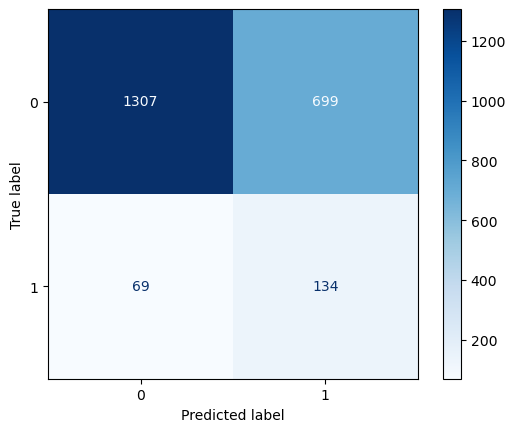

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_validation, rs.predict(x_validation))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

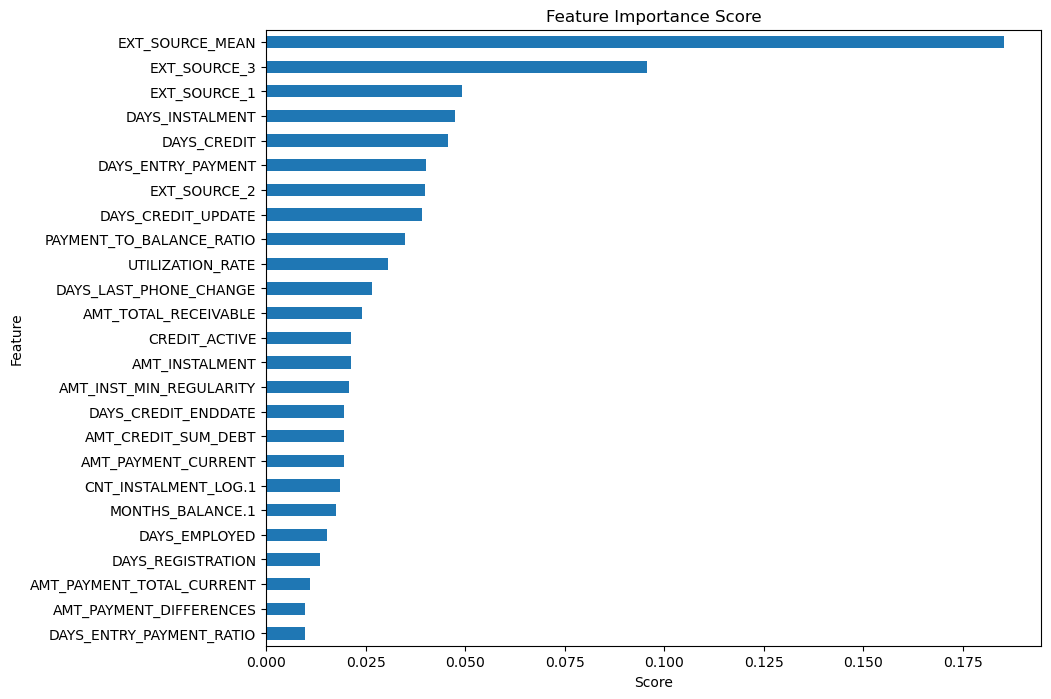

In [69]:
show_feature_importance(rs.best_estimator_)

## Oversampling

In [89]:
x_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE(sampling_strategy="minority").fit_resample(x_train, y_train)

In [91]:
y_train_SMOTE.value_counts()

TARGET
0         7950
1         7950
Name: count, dtype: int64

In [93]:
rf = RandomForestClassifier()
rf.fit(x_train_SMOTE, y_train_SMOTE)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [97]:
evalClassification(rf, x_train_SMOTE, y_train_SMOTE)

Accuracy (test) :  0.8913535536441829
Accuracy (train) :  1.0

Precision (test) :  0.16363636363636364
Precision (train) :  1.0

Recall (test) :  0.04433497536945813
Recall (train) :  1.0

F1 Score (test) : 0.06976744186046512
F1 Score (train) : 1.0

AUC Score (test) : 0.6746165444553041
AUC Score (train) : 1.0



In [129]:
n_estimators = [int(i) for i in np.linspace(5, 100, 100)]
criterion = ["gini", "entropy", "log_loss"]
max_depth = [int(i) for i in np.linspace(5, 100, 100)]
min_samples_split = [int(i) for i in np.linspace(2, 20, 20)]
min_samples_leaf = [int(i) for i in np.linspace(1, 20, 20)]
max_features = ["sqrt", "log2"]
max_leaf_nodes = [int(i) for i in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                      max_features=max_features,
                      max_leaf_nodes=max_leaf_nodes)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring="recall", n_jobs=2, cv=5, verbose=1, random_state=25)
rs.fit(x_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [2, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [5, 5, 6, 7, 8, 9, 10,
                                                         11, 12, 13, 14, 15, 16,
                                                         17, 18, 19, 20, 21, 22,
                                                         23, 24, 25, 26, 27, 28,
                                                         28, 29, 30, 31, 32, ...]},
                   random_state=25, scoring='recall', verbose=1)

In [131]:
evalClassification(rs, x_train_SMOTE, y_train_SMOTE)

Accuracy (test) :  0.7288365776369398
Accuracy (train) :  0.8029559748427673

Precision (test) :  0.15263157894736842
Precision (train) :  0.7851308156742038

Recall (test) :  0.42857142857142855
Recall (train) :  0.8342138364779874

F1 Score (test) : 0.22509702457956016
F1 Score (train) : 0.8089284625236324

AUC Score (test) : 0.6524109936201248
AUC Score (train) : 0.8858040188283691



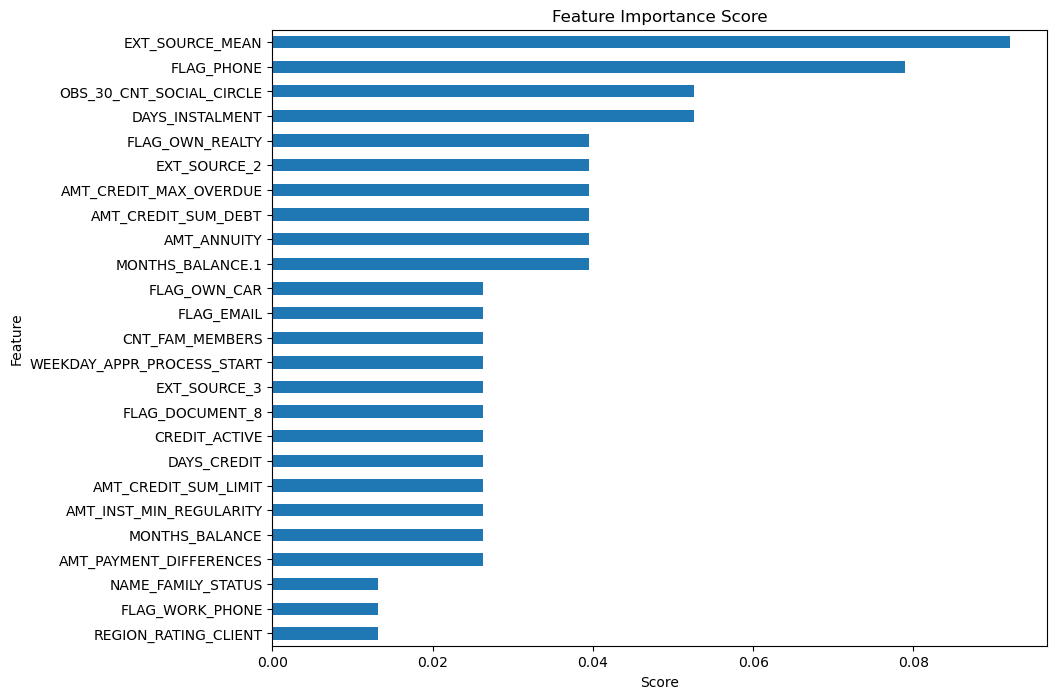

In [133]:
show_feature_importance(rs.best_estimator_)